In [31]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering

1. Load the data file and explore the data, showing size, data descriptions,
data distributions with boxplot, pairplots

In [3]:
df = pd.read_csv('data.csv')
print(f'{df.head()}\n')
print(f'{df.shape}\n')
print(f'{df.describe()}\n')
print(f'{df.info()}\n')
print(f'{df.isnull().sum()}\n')

           V0    V1    V2    V3    V4   V5   V6    V7    V8
0  ADT1_YEAST  0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22
1  ADT2_YEAST  0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22
2  ADT3_YEAST  0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22
3  AAR2_YEAST  0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22
4  AATM_YEAST  0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22

(1484, 9)

                V1           V2           V3           V4           V5  \
count  1484.000000  1484.000000  1484.000000  1484.000000  1484.000000   
mean      0.500121     0.499933     0.500034     0.261186     0.504717   
std       0.137299     0.123924     0.086670     0.137098     0.048351   
min       0.110000     0.130000     0.210000     0.000000     0.500000   
25%       0.410000     0.420000     0.460000     0.170000     0.500000   
50%       0.490000     0.490000     0.510000     0.220000     0.500000   
75%       0.580000     0.570000     0.550000     0.320000     0.500000   
max       1.000000     1.000000     

In [11]:
print(f'{df['V0'].nunique()}') #the first column in probably an index column
#as we can see it has 1462 different values, our df has 1484 rows, we can drop
# the 'V0' column.

1462


<Axes: >

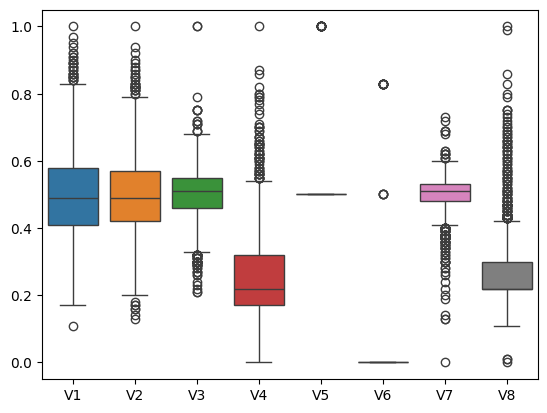

In [12]:
sns.boxplot(df)

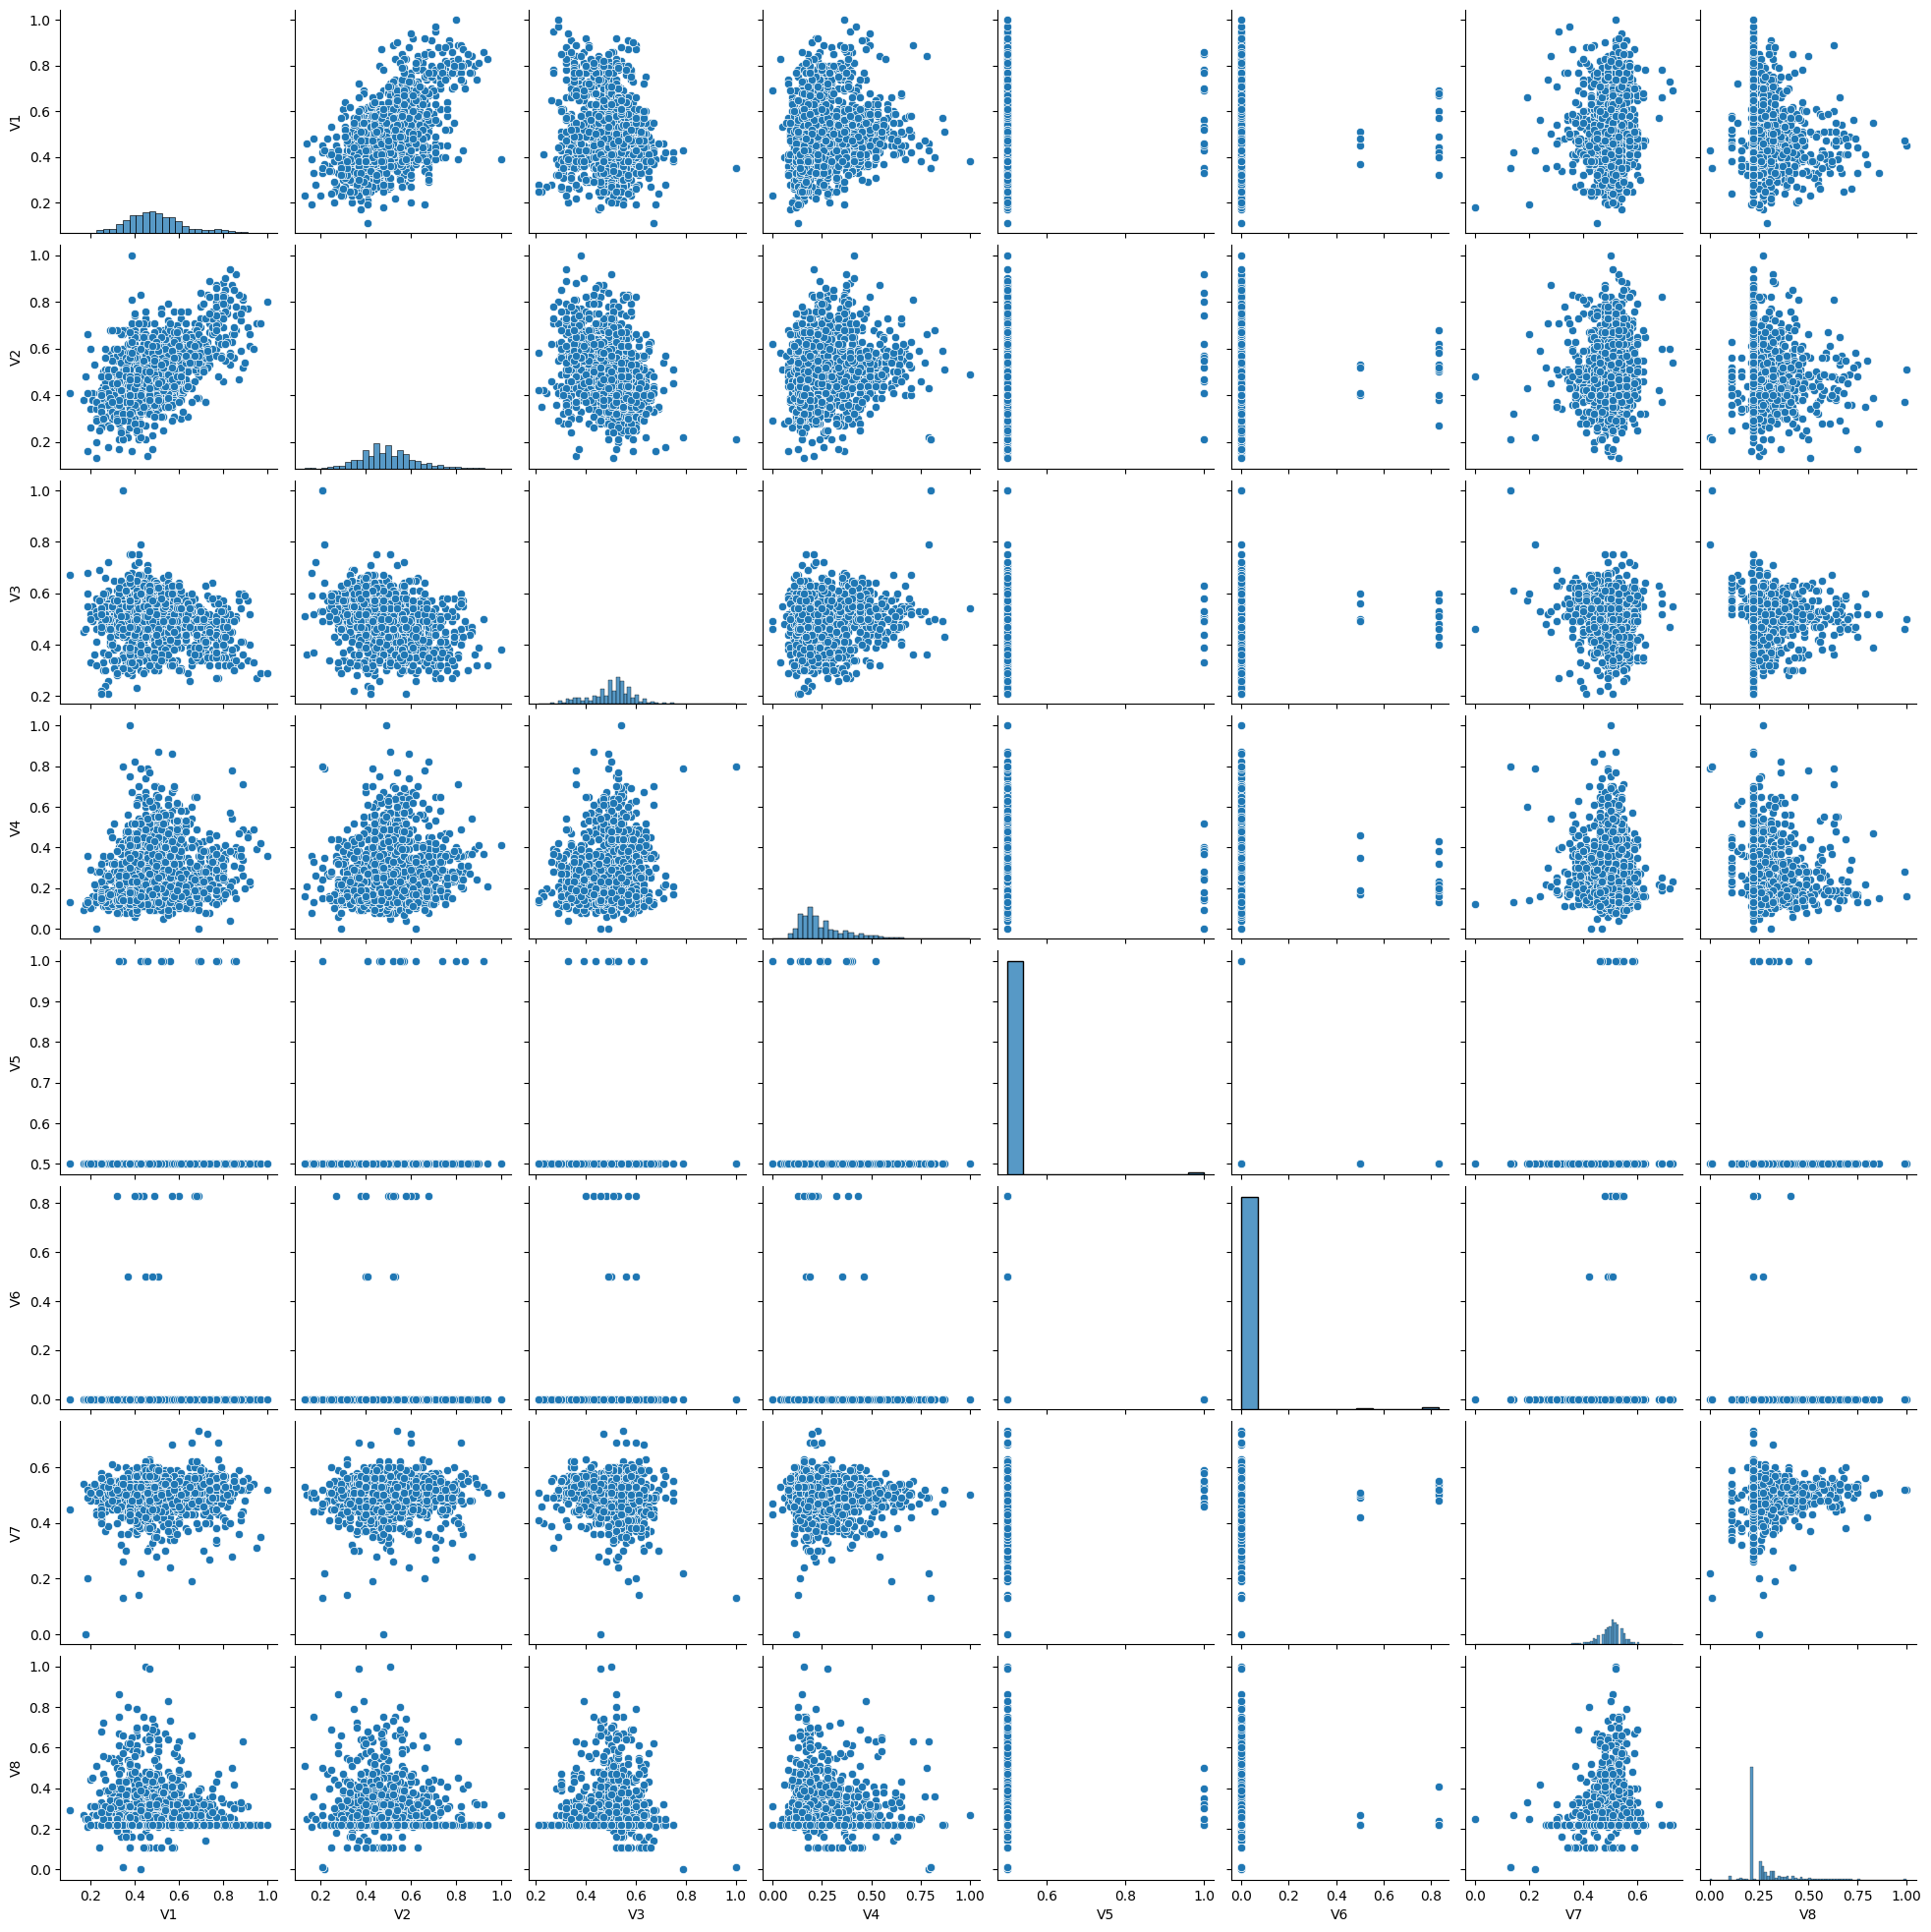

In [14]:
sns.pairplot(df)

2. Comment the exploration of step 1 pointing out if there are imbalanced
distributions, outliers, missing values, non–numeric fields with number
of distinct values similar to the number of records

we don't have NaN values, but thanks to `df.describe()` function we can observe that columns like `V05` and `V06` have a peculiar behavior.  

* as for V05 columns we see that min, 1/3, 1/2 and 3/4 are all the same value (0.5, all really close to the mean value of the colum)
* V06 instead has a pretty flat mean value close to 0.0.

As we could deduce from the fuction before, the boxplot confirmed it. all the columns have several numbers of outliers but V05, V06

3. Drop the columns that are not relevant for the clustering operation, if
any, and explain why you do that.
Deal with missing values, if any

In [13]:
#dropping the id column
df = df.drop(columns=['V0'])
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22


4. find the best clustering scheme with KMeans, require not less than 3
clusters, show the hyperparameters, show the silhouette plots of clus
ters, show the distribution of the resulting cluster labels (e.g. histogram
or pie plot)

In [47]:
inertia_scores = []
silhouette_scores = []
# mettiamo  di default dei valori che verranno sovrascritti subito dopo
best_kmeans_models = None
bes_k = -1
best_silhouette = -1

for k in range(3,15):
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  cluster_labels = kmeans.fit_predict(df)
  # non chiede di trovare l'inertia, è per ripasso
  inertia_scores.append(kmeans.inertia_)

  score = silhouette_score(df, cluster_labels)
  silhouette_scores.append(score)

  if score > best_silhouette:
    best_silhouette = score
    best_k = k
    best_kmeans_models = kmeans
print('KMEANS:')
print(f'k={best_k}, silhouette score:{best_silhouette:.4f}')
print(f"Hyperparameters:{best_kmeans_models.get_params()}")



KMEANS:
k=4, silhouette score:0.2655
Hyperparameters:{'algorithm': 'lloyd', 'copy_x': True, 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 4, 'n_init': 'auto', 'random_state': 42, 'tol': 0.0001, 'verbose': 0}


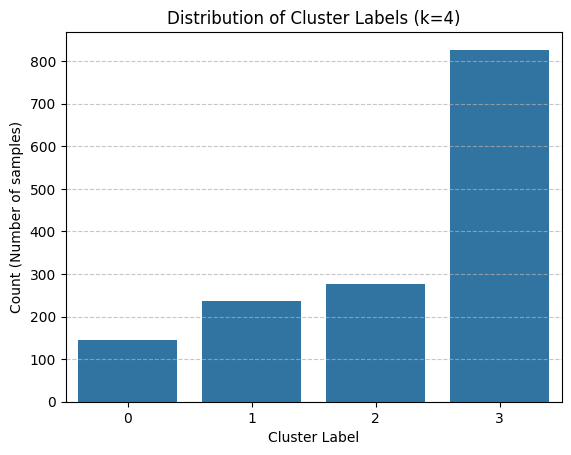

In [30]:
# labels_ è una lista (array numpy) lunga quanto ul datase.<
# per ogni riga del file csv, contiene il numero del cluster
# a cui quella riga è stata assegnata
sns.countplot(x = best_kmeans_models.labels_)
plt.title(f"Distribution of Cluster Labels (k={best_k})")
plt.xlabel("Cluster Label")
plt.ylabel("Count (Number of samples)")
plt.grid(axis='y', linestyle='--', alpha=0.7) # Aggiunge una griglia leggera orizzontale
plt.show()

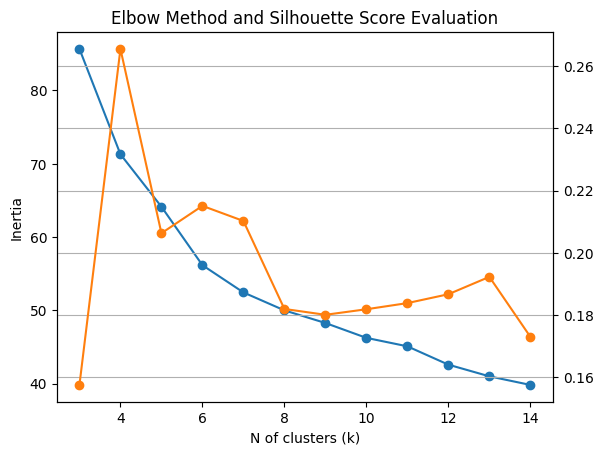

In [44]:
# ripasso
fig, ax1 = plt.subplots()
ax1.plot(range(3,15), inertia_scores, label='Inertia(Elbow)', marker='o')
ax1.set_xlabel('N of clusters (k)')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method and Silhouette Score Evaluation')

ax2 = ax1.twinx()
ax2.plot(range(3,15), silhouette_scores, label='Silhouette Score', color='tab:orange', marker='o')
plt.grid(True)
plt.show()

5. find the best clustering scheme with Agglomerative Clustering or DB
SCAN (your choice), require not less than 3 clusters, show the hyper
parameters, show the silhouette plots of clusters, show the distribution
of the resulting cluster labels (e.g. histogram or pie plot)

In [48]:
best_agg_model=None
best_kagg = -1
best_silhouetteagg = -1
silhouette_scores_agg = []

for k in range(3,15):
  agg = AgglomerativeClustering(n_clusters = k)
  labels = agg.fit_predict(df)

  score = silhouette_score(df, labels)
  silhouette_scores_agg.append(score)

  if score > best_silhouetteagg:
    best_silhouetteagg = score
    best_kagg = k
    best_agg_model = agg
print('AGGLOMERATIVE CLUSTERING')
print(f'k={best_kagg}, silhouette score:{best_silhouetteagg:.4f}')
print(f"Hyperparameters:{best_agg_model.get_params()}")


AGGLOMERATIVE CLUSTERING
k=3, silhouette score:0.2618
Hyperparameters:{'compute_distances': False, 'compute_full_tree': 'auto', 'connectivity': None, 'distance_threshold': None, 'linkage': 'ward', 'memory': None, 'metric': 'euclidean', 'n_clusters': 3}


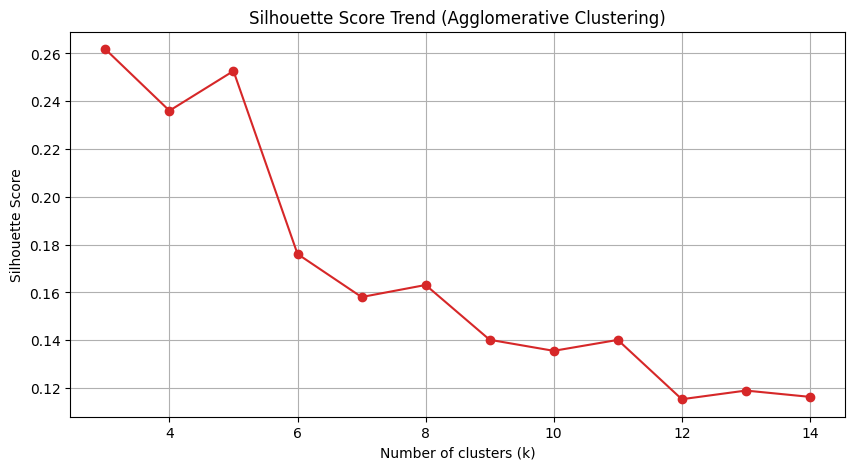

In [40]:
# agglomerative clustering non ha l'inerzia perchè il concetto
# di distanza dal centroide esiste solo nel kmean,
# quindi non si può plottare nello stesso modo

plt.figure(figsize=(10, 5))
plt.plot(range(3,15), silhouette_scores_agg, marker='o', linestyle='-', color='tab:red')
plt.title('Silhouette Score Trend (Agglomerative Clustering)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

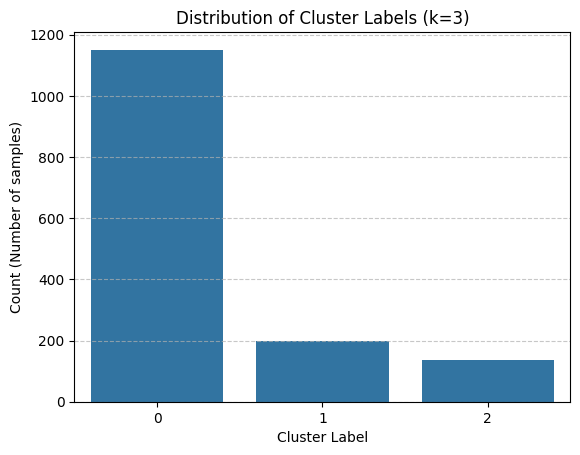

In [45]:
sns.countplot(x = best_agg_model.labels_)
plt.title(f"Distribution of Cluster Labels (k={best_kagg})")
plt.xlabel("Cluster Label")
plt.ylabel("Count (Number of samples)")
plt.grid(axis='y', linestyle='--', alpha=0.7) # Aggiunge una griglia leggera orizzontale
plt.show()

6. Comment the results

In this analysis, we compared two clustering algorithms: KMeans and Agglomerative Clustering.

**1. Performance Comparison (Silhouette Score):**

* **KMeans:** The best configuration was found at k = 4 with a Silhouette Score of 0.2655.
* **Agglomerative Clustering:** The best configuration was found at k = 3 with a Silhouette Score of 0.2618.



**2. Analysis and Interpretation:**
* **Score Evaluation:** Both algorithms achieved a Silhouette Score around 0.26. This indicates that the clusters are not perfectly separated and there might be some overlapping between groups. However, this is the best structure identifiable in the dataset given the available features.
* **Comparison:** The scores are extremely similar (difference of less than 0.004). However, KMeans performed slightly better.
* **Cluster Count:** It is interesting to note that the algorithms suggest a different optimal number of clusters (4 for KMeans vs 3 for Agglomerative), suggesting that one cluster might be ambiguous and can be either split or merged depending on the distance metric used.

**3. Conclusion:**
Based on the maximization of the Silhouette Score, I selected KMeans with k=4 as the best clustering scheme for this dataset, as it provides the slightly superior separation of the samples.